In [1]:
import pandas as pd


In [2]:
compras= pd.read_csv('/content/compras_supermercado_correto2.csv')
compras

,id_da_compra,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,valor_total_da_compra
0,1,leite integral,salsicha,sal de cozinha,melancia,carne bovina,manga,alface,arroz,óleo de soja,feijão,batata,macarrão,quiabo,couve-flor,açúcar,192.89
1,2,cebola,creme de leite,ervilha,chuchu,chocolate branco,ovos,tomate,feijão,macarrão,café,massas,peixe,leite de coco,pera,fubá de milho,168.27
2,3,laranja,carne bovina,tangerina,leite fermentado,manteiga,farinha de mandioca,banana,leite integral,arroz,leite condensado,farinha de trigo,carne suína,chocolate,leite integral,molho de tomate,189.14
3,4,linguiça,abóbora,molho de tomate,óleo de soja,farinha de trigo,salsicha,iogurte,café,cebola,farinha de milho,farinha de mandioca,banana,chocolate,sal de cozinha,feijão,199.95
4,5,manga,leite integral,leite de coco,limão,farinha de mandioca,laranja,frango,cebola,linguiça,massas,couve-flor,carne suína,leite fermentado,sal de cozinha,abóbora,143.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,chocolate branco,linguiça,manga,fubá de milho,ovos,iogurte,farinha de mandioca,café,molho de tomate,açúcar,maça,abóbora,melancia,manteiga,creme de leite,191.81
996,997,leite condensado,tangerina,coco ralado,carne suína,arroz,fubá de milho,frango,quiabo,molho de tomate,batata,berinjela,batata-doce,banana,repolho,abóbora,169.07
997,998,óleo de soja,farinha de mandioca,ervilha,carne suína,laranja,batata-doce,couve-flor,creme de leite,arroz,chocolate granulado,abacaxi,berinjela,manga,leite de coco,macarrão,176.46
998,999,carne suína,limão,fubá de milho,banana,tangerina,óleo de soja,feijão,macarrão,salsicha,chocolate,leite condensado,repolho,ervilha,pimentão,leite em pó,136.11


In [3]:
# Consolidando itens comprados em uma lista e padronizando

compras['Itens Comprados'] = compras.apply(
    lambda row: [row[col].lower().strip() for col in compras.columns if 'item' in col and row[col].strip() != ''], axis=1)

# Remover as colunas individuais de itens

colunas_para_remover = [col for col in compras.columns if 'item' in col]
compras.drop(columns=colunas_para_remover, inplace=True)

In [4]:
pip install ydata-profiling

In [5]:
from pandas_profiling import ProfileReport

<ipython-input-5-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [6]:
# Visualizando essa base
display(compras)


,id_da_compra,valor_total_da_compra,Itens Comprados
0,1,192.89,"[leite integral, salsicha, sal de cozinha, mel..."
1,2,168.27,"[cebola, creme de leite, ervilha, chuchu, choc..."
2,3,189.14,"[laranja, carne bovina, tangerina, leite ferme..."
3,4,199.95,"[linguiça, abóbora, molho de tomate, óleo de s..."
4,5,143.39,"[manga, leite integral, leite de coco, limão, ..."
...,...,...,...
995,996,191.81,"[chocolate branco, linguiça, manga, fubá de mi..."
996,997,169.07,"[leite condensado, tangerina, coco ralado, car..."
997,998,176.46,"[óleo de soja, farinha de mandioca, ervilha, c..."
998,999,136.11,"[carne suína, limão, fubá de milho, banana, ta..."


In [7]:
import matplotlib.pyplot as plt
import ydata_profiling


In [8]:
pip install --upgrade Pillow

In [12]:
# Certificando que todos os itens na coluna 'Ingredientes' são tratados como strings

compras['Itens Comprados'] = compras['Itens Comprados'].astype(str)

In [13]:
profile = ProfileReport(compras)
profile.to_file("meu_relatorioCompras.html")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-18-93967800886a>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='red', label='Curva Gaussiana')


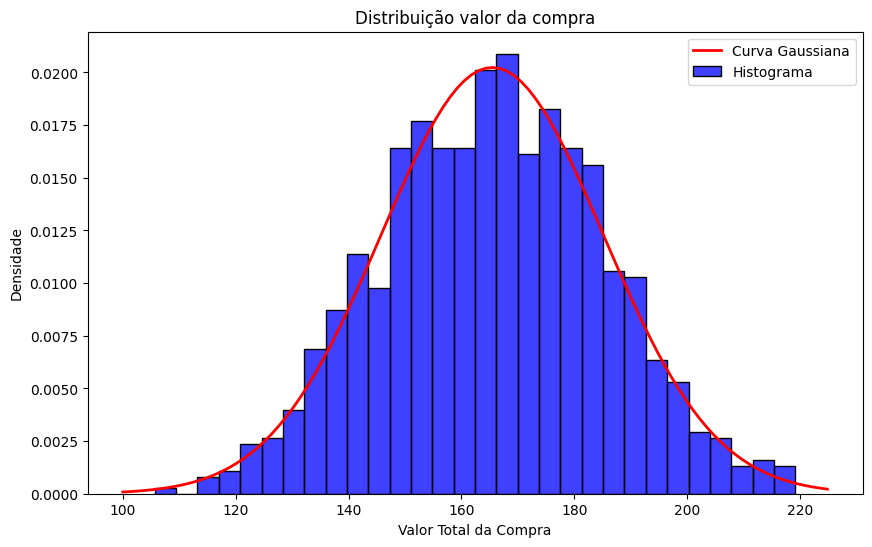

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

valores = compras['valor_total_da_compra']

# Plotar o histograma

plt.figure(figsize=(10, 6))
sns.histplot(valores, kde=False, bins=30, stat="density", color='blue', label='Histograma')

# Calcular média e desvio padrão
media, desvio_padrao = norm.fit(valores)

# Adicionar a curva de distribuição gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desvio_padrao)
plt.plot(x, p, 'k', linewidth=2, color='red', label='Curva Gaussiana')

title = "Distribuição valor da compra"
plt.title(title)
plt.xlabel('Valor Total da Compra')
plt.ylabel('Densidade')
plt.legend()

plt.show()


In [19]:
receitas= pd.read_excel('/content/Receitas.TudoGostoso.xlsx')
receitas

,id,Nome da Receita,Ingredientes
0,1,Pão de Queijo,"Polvilho doce, tempero ou sal, leite, óleo, ov..."
1,2,Tapioca,"Polvilho doce, sal, água"
2,3,Bolo de Fubá,"Ovos, açúcar, trigo, fubá, margarina, leite, f..."
3,4,Feijoada,"Feijão preto, carne de porco (linguiça, costel..."
4,5,Moqueca de Peixe,"Peixe (robalo, badejo), dendê, leite de coco, ..."
5,6,Brigadeiro,"Leite condensado, chocolate em pó, manteiga, g..."
6,7,Coxinha,"Frango cozido e desfiado, massa de batata, far..."
7,8,Quindim,"Gemas de ovo, açúcar, coco ralado, manteiga, c..."
8,9,Bobó de Camarão,"Camarões, mandioca, leite de coco, azeite de d..."
9,10,Acarajé,"Feijão fradinho, cebola, camarão seco, azeite ..."


In [21]:
profile1 = ProfileReport(receitas)
profile1.to_file("meu_relatorioReceitas.html")

profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

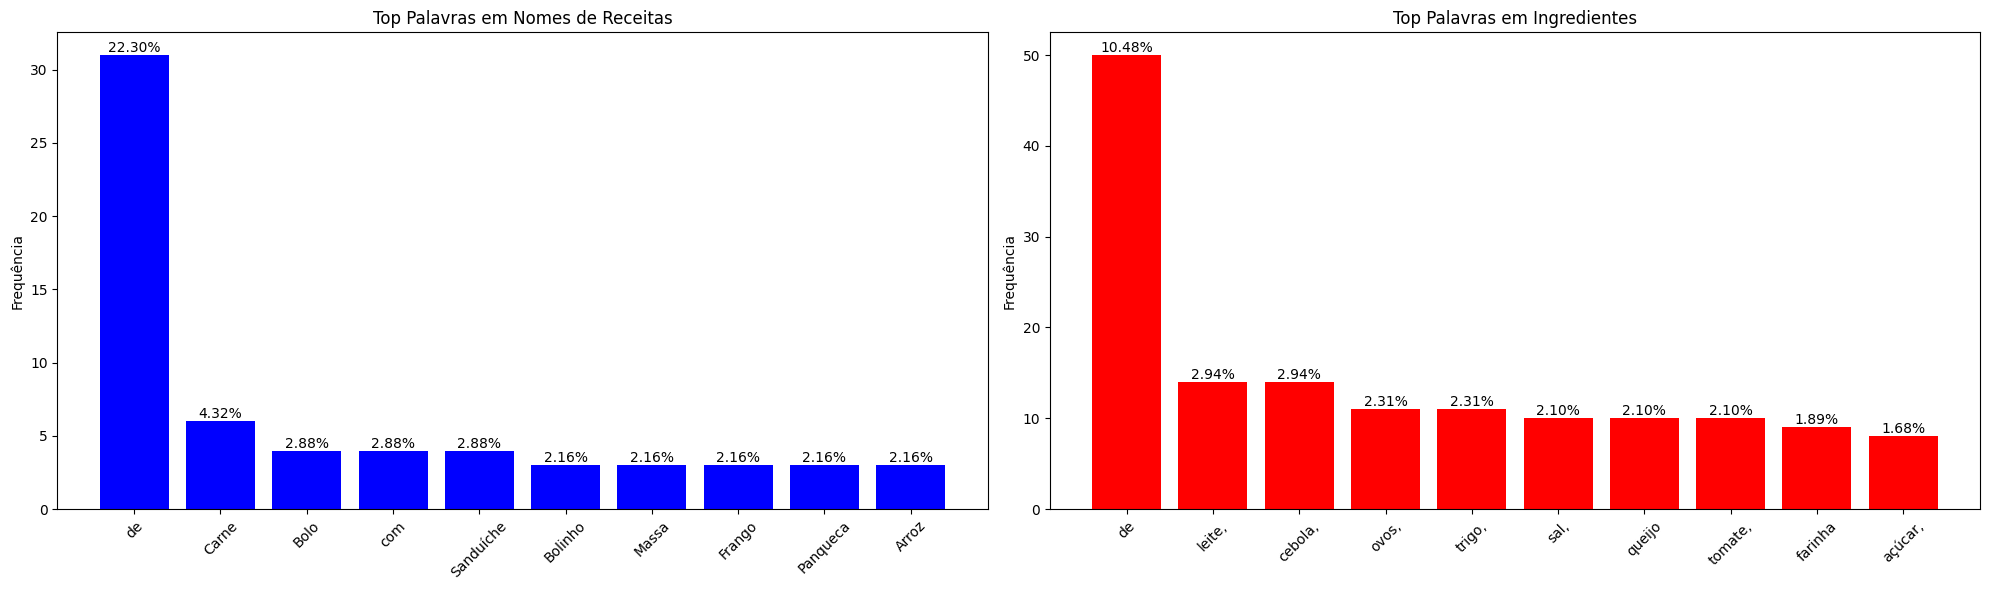

In [23]:
from collections import Counter
import matplotlib.pyplot as plt


# Função para contar palavras e retornar as mais comuns

def contar_palavras(coluna, n_top=10):
    todas_palavras = ' '.join(coluna).split()
    contagem_palavras = Counter(todas_palavras)
    total_palavras = sum(contagem_palavras.values())
    mais_comuns = contagem_palavras.most_common(n_top)
    # Calcular o percentual para as mais comuns
    mais_comuns_percentual = [(palavra, freq, freq / total_palavras * 100) for palavra, freq in mais_comuns]
    return mais_comuns_percentual

# Contar palavras

top_nomes = contar_palavras(receitas['Nome da Receita'])
top_ingredientes = contar_palavras(receitas['Ingredientes'])

# Converter as listas de tuplas mais comuns em DataFrame para facilitar a plotagem

df_top_nomes = pd.DataFrame(top_nomes, columns=['Palavra', 'Frequência', 'Percentual'])
df_top_ingredientes = pd.DataFrame(top_ingredientes, columns=['Palavra', 'Frequência', 'Percentual'])

# Gráficos de barras
plt.figure(figsize=(20, 6))

# Nomes das receitas

plt.subplot(1, 2, 1)
bars = plt.bar(df_top_nomes['Palavra'], df_top_nomes['Frequência'], color='blue')
plt.title('Top Palavras em Nomes de Receitas')
plt.xticks(rotation=45)
plt.ylabel('Frequência')

# Adicionar percentuais no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{df_top_nomes["Percentual"][bars.index(bar)]:.2f}%', ha='center', va='bottom')

# Ingredientes
plt.subplot(1, 2, 2)
bars = plt.bar(df_top_ingredientes['Palavra'], df_top_ingredientes['Frequência'], color='red')
plt.title('Top Palavras em Ingredientes')
plt.xticks(rotation=45)
plt.ylabel('Frequência')

# Adicionar percentuais no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{df_top_ingredientes["Percentual"][bars.index(bar)]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()
